<a href="https://colab.research.google.com/github/Walaa-Gaber/Hosoital-Registration-system/blob/main/FaceEmotionRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
print(tf.__version__)      #create deep leaning models

2.15.0


# New Section

In [ ]:
import keras
print(keras.__version__) #python interface

2.15.0


In [ ]:



import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import cv2
from zipfile import *

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers

#from keras import backend as K
from keras.metrics import categorical_crossentropy
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, MaxPooling2D, Flatten, Conv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
target_size=(256,256) #provided by network resizing

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
!pip install split-folders


In [ ]:
import splitfolders

# Input folder where your dataset is located
input_folder = '/content/drive/My Drive/archive/CK+48'  # Replace with the path to your dataset directory

# Output folder where the split dataset will be saved
output_folder = '/content/drive/My Drive/Colab Notebooks'  # Replace with the path where you want the split datasets to be saved

# Split with a ratio of 80% train, 10% validation, and 10% test
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1), group_prefix=None)  # No group prefix, since our dataset has no group structure

Copying files: 981 files [00:19, 51.22 files/s]


In [ ]:
#ba2sm el swar w b7dd el directory bt3o w b7dd el batch size
#improve the performance of the model by increasing the size of the training data and reducing overfitting.
train_datagen = ImageDataGenerator(
    rescale=1./255, #to rescale pixels of image
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/train', #path to the training images
    target_size=target_size, # resize the images to the specified dimensions.
    color_mode='rgb',
    batch_size=32, #number of images to be generated in each batch
    class_mode='categorical',
    subset='training',shuffle=True) # set as training data
# flow_from_directory method can be used to iterate over the batches of training data in a for loop, and each batch contains a set of images and their corresponding labels.

# train_generator.shuffle(5, reshuffle_each_iteration=True)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/val', # same directory as training data
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    subset='validation',shuffle=True) # set as validation data
# evaluate the performance of the trained model on a separate set of data that was not used during training.

datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/test/',
    target_size=target_size,
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',shuffle=True)
# evaluate the performance of the trained model on a separate set of test data that was not used during training or validation.

# Set “binary” if you have only two classes to predict, if not set to“categorical”

Found 708 images belonging to 7 classes.
Found 6 images belonging to 7 classes.
Found 104 images belonging to 7 classes.


In [ ]:

train_generator.image_shape # bcheck 3la el shape
# determined by the target_size parameter passed to the flow_from_directory method

(256, 256, 3)

In [ ]:
train_generator.class_indices #bcheck 3la el classes el training
#dictionary of index

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
#sequential stack of layers, where each layer is a convolutional neural network (CNN) layer followed by a max pooling layer.

model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(256,256,3)),
   #This layer applies a set of filters to the input image to extract features.
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)), #remove pixels to down scale
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
   tf.keras.layers.Flatten(), # flattens the 2D feature maps into 1D feature vectors.
   tf.keras.layers.Dense(32, activation='relu'), # applies a fully connected neural network to the output of the previous layer
   #tf.keras.layers.Dropout(rate=0.5), #drops out 50% of the units in the previous layer during training to prevent overfitting
   tf.keras.layers.Dense(7, activation='softmax')
   #output a final probability for each layer
])

In [ ]:
# Adam optimizer, loss function will be categorical cross entropy, evaluation metric will be accuracy
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=opt ,metrics=["accuracy"])
#The BinaryCrossentropy loss function is used to measure the difference between the predicted probability scores and the true labels.

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)       

In [ ]:
history = model.fit(train_generator, validation_data=validation_generator, epochs=70,
                    batch_size=32,callbacks=[EarlyStopping(monitor='val_loss', patience=7, verbose=0)])
#The epochs parameter is set to 40, which specifies the number of times the model should be trained on the entire training dataset.

Epoch 1/70
23/23 [==============================] - 129s 5s/step - loss: 0.4715 - accuracy: 0.2373 - val_loss: 0.3968 - val_accuracy: 0.3333
Epoch 2/70
23/23 [==============================] - 121s 5s/step - loss: 0.3987 - accuracy: 0.2486 - val_loss: 0.3989 - val_accuracy: 0.3333
Epoch 3/70
23/23 [==============================] - 125s 5s/step - loss: 0.3943 - accuracy: 0.2486 - val_loss: 0.3819 - val_accuracy: 0.3333
Epoch 4/70
23/23 [==============================] - 121s 5s/step - loss: 0.3924 - accuracy: 0.2698 - val_loss: 0.3533 - val_accuracy: 0.5000
Epoch 5/70
23/23 [==============================] - 121s 5s/step - loss: 0.3826 - accuracy: 0.3347 - val_loss: 0.3276 - val_accuracy: 0.5000
Epoch 6/70
23/23 [==============================] - 123s 5s/step - loss: 0.3498 - accuracy: 0.4379 - val_loss: 0.3336 - val_accuracy: 0.3333
Epoch 7/70
23/23 [==============================] - 121s 5s/step - loss: 0.3261 - accuracy: 0.4774 - val_loss: 0.2166 - val_accuracy: 0.5000
Epoch 8/70
23

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
#Train and validation accuracy

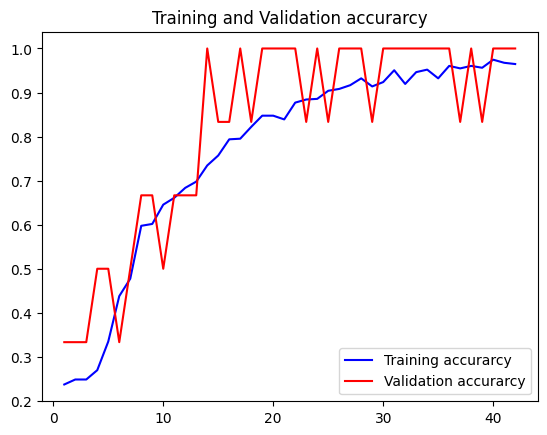

In [ ]:
plt.plot(epochs, accuracy, 'b', label='Training accurarcy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

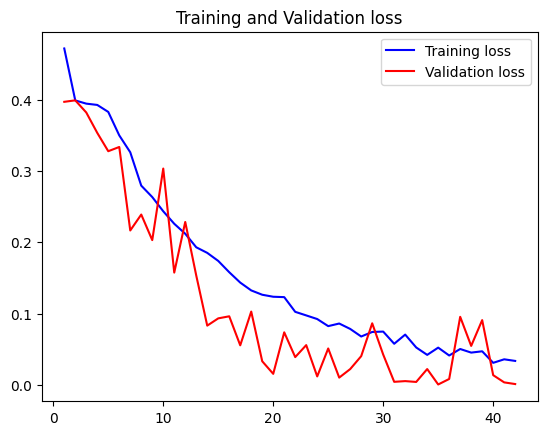

In [ ]:
plt.figure() # to plot new figure
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc*100}')

4/4 [==============================] - 5s 875ms/step - loss: 13.9789 - accuracy: 0.8558
Test Accuracy: 85.57692170143127


1/1 [==============================] - 1s 837ms/step
fear


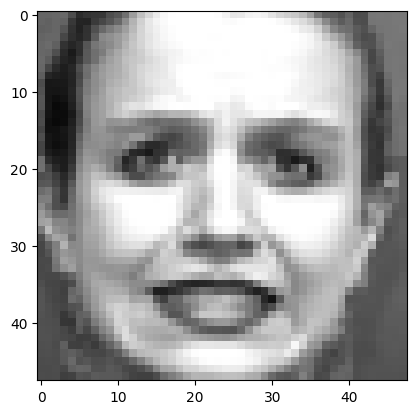

In [ ]:
class_label={0 : 'anger', 1 : 'contempt', 2 : 'disgust', 3 : 'fear', 4 : 'happy', 5 : 'sadness', 6 : 'surprise'}  # Define dictionary mapping integer emotion category labels to their corresponding names img_width=256
img_height=256
def prepare(img_path):
  img = image.load_img(img_path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = x/255 #adding a batch dimension of size 1, since our model keras expects input images as a batch of size 1
  return np.expand_dims(x, axis=0) #expands the dimensions of the image to be (1, 256, 256, 3) using the np.expand_dims function.



result = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/test/fear/S055_006_00000008.png')])
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/test/fear/S055_006_00000008.png')
plt.imshow(img)
print(class_label[np.argmax(result[0])])



1/1 [==============================] - 0s 164ms/step
happy


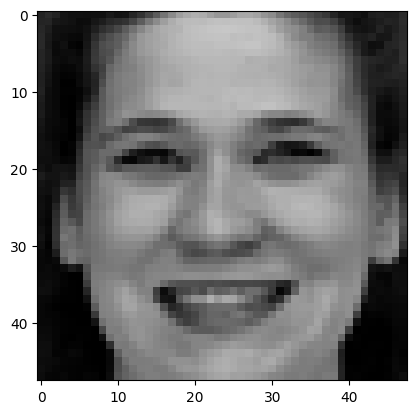

In [ ]:
result2 = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/test/happy/S127_004_00000016.png')])
Animal=image.load_img('/content/drive/MyDrive/Colab Notebooks/test/happy/S127_004_00000016.png')
plt.imshow(Animal)
print(class_label[np.argmax(result2[0])])

1/1 [==============================] - 0s 61ms/step
surprise


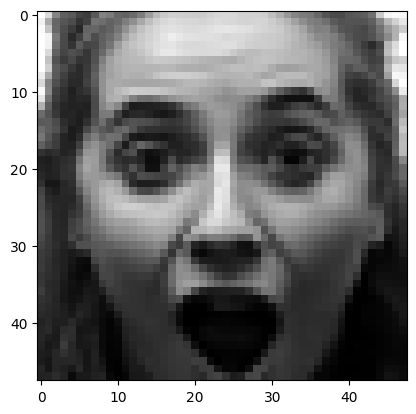

In [ ]:
result3 = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/test/surprise/S014_001_00000029.png')])
Animal=image.load_img('/content/drive/MyDrive/Colab Notebooks/test/surprise/S014_001_00000029.png')
plt.imshow(Animal)
print(class_label[np.argmax(result3[0])])